# Classification MNIST avec Réseaux de Neurones

Dans ce notebook, nous allons explorer trois méthodes pour implémenter un réseau de neurones simple pour classifier le dataset MNIST. Nous utiliserons :
- **Keras/TensorFlow** pour une approche simple et intuitive
- **PyTorch** pour une approche plus flexible
- **Une implémentation from scratch** pour comprendre les bases du fonctionnement d'un réseau de neurones

Le dataset MNIST est un ensemble de données classique utilisé pour entraîner et tester les modèles de classification d'images. Il contient 60 000 images d'entraînement et 10 000 images de test de chiffres manuscrits (0 à 9).

In [20]:
! pip install --upgrade pip
! pip install tensorflow[and-cuda]
! pip install matplotlib
! pip install torch
! pip install pydot

  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.7.29-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.12.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.4.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.5.4.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.2.0.103-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_

In [1]:
# Pour Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

# Pour PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Pour l'approche "From Scratch"
import numpy as np

# Pour la visualisation
import matplotlib.pyplot as plt

# Lecture image
from PIL import Image

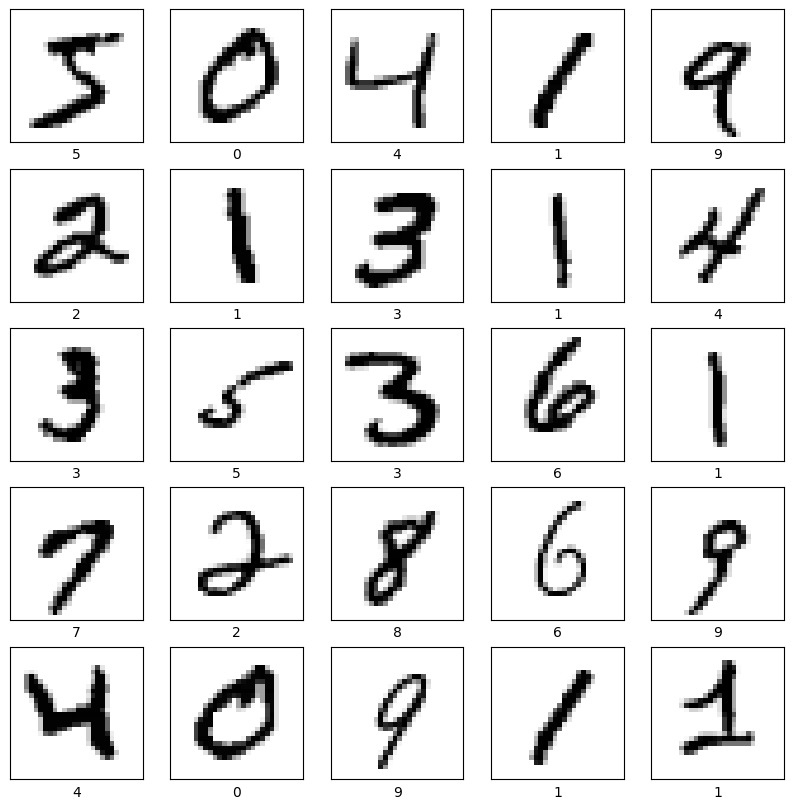

In [5]:
# Chargement des données
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation des images
x_train = X_train / 255.0
x_test = X_test / 255.0

# Visualisation des exemples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Keras/TensorFlow

In [22]:
# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train scalar: ", X_train.shape)

# -1 autoadaptation au nombre d'image (60_000) / dans ce cas on peut remplacer par 60_000
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("X_train vector: ", X_train.shape)
print("y_train vector: ", y_train.shape)

X_train scalar:  (60000, 28, 28)
X_train vector:  (60000, 28, 28, 1)
y_train vector:  (60000, 10)


In [23]:
# Normalisatoin des images

print("Avant normalisation : min={}, max={}".format(X_train.min(),X_train.max()))

xmax = X_train.max()
X_train = X_train/xmax
X_test = X_test/xmax

print("Après normalisation : min={}, max={}".format(X_train.min(),X_train.max()))

Avant normalisation : min=0, max=255
Après normalisation : min=0.0, max=1.0


Maxpooling2D

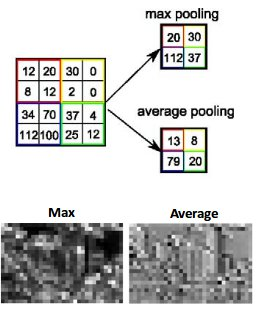

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Input((28,28,1)))

# 8 kernel de 3x3
model.add(keras.layers.Conv2D(8,(3,3), activation='relu'))
# Reduction avec maxpooling
model.add(keras.layers.MaxPooling2D((2,2)))
# Débranche 20% des neuronnes à chaques itération (pas de mise à jour de leur poids)
model.add(keras.layers.Dropout(0.2))

# 16 kernel de 3x3
# 8 plans convolutifs de 13x13 (28-3+1 = 26, 26/2 = 13)
model.add(keras.layers.Conv2D(16,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

# 11 plans conv de 5x5 (13-3+1 = 11, 11/2 = 13)
# Fin des convolutions (5x5 trop petit)
# Applatissement
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

Comment choisir les paramètres (20%, 100 neurones, etc ...)
- Tester !
- Lire la litérature sur ce qui fonctionne le mieu !

In [ ]:
# Création du modèle avec Keras
model = models.Sequential([
    # Alors le 1 corespond au fait que nous ne somme pas sur du RGB sinon input_shape=(28, 28, 3)
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Entraînement
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16, batch_size=512)

batch_size=512
epochs=16
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4491 - loss: 1.6505 - val_accuracy: 0.9145 - val_loss: 0.3236
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8444 - loss: 0.4950 - val_accuracy: 0.9467 - val_loss: 0.1824
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9000 - loss: 0.3278 - val_accuracy: 0.9617 - val_loss: 0.1241
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9211 - loss: 0.2590 - val_accuracy: 0.9694 - val_loss: 0.0988
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9350 - loss: 0.2084 - val_accuracy: 0.9737 - val_loss: 0.0813
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9437 - loss: 0.1860 - val_accuracy: 0.9779 - val_loss: 0.0695
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9486 - loss: 0.1711 - val_accuracy: 0.9796 - val_loss: 0.0632
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9545 - loss: 0.1479 - val_accu

In [28]:
# Évaluation sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0461
Test accuracy: 0.9873999953269958


In [15]:
image_path = "sample_image.png"
image = Image.open(image_path)
image = image.resize((28,28))
image = image.convert('L')
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Le modèle prédit: {predicted_label[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Le modèle prédit: 7


In [16]:
image_path = "sample_image.png"
image = Image.open(image_path)
image = image.resize((28,28))
image = image.rotate(180)
image = image.convert('L')
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Le modèle prédit: {predicted_label[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Le modèle prédit: 4


In [22]:
from tensorflow.keras.utils import plot_model

# Afficher le schéma du modèle et le sauvegarder en tant qu'image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### PyTorch

In [ ]:
from torchvision import datasets, transforms

# Définition des transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Chargement des données
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return nn.LogSoftmax(dim=1)(x)

# Instantiation du modèle
model = Net()

# Définition de l'optimiseur et de la fonction de perte
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Entraînement
epochs = 10
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()


In [ ]:
# Évaluation du modèle PyTorch
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Test accuracy: {100 * correct / total}%')

## "From Scratch"

In [ ]:
# Chargement des données depuis Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation
X_train, X_test = X_train / 255.0, X_test / 255.0

# Conversion des labels en one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [ ]:
# Définition des fonctions d'activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Définition du réseau de neurones simple
class SimpleNN:
    def __init__(self):
        self.W1 = np.random.randn(784, 128) * 0.01
        self.b1 = np.zeros((1, 128))
        self.W2 = np.random.randn(128, 10) * 0.01
        self.b2 = np.zeros((1, 10))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def compute_loss(self, Y, Y_hat):
        m = Y.shape[0]
        logprobs = -np.log(Y_hat[range(m), Y.argmax(axis=1)])
        loss = np.sum(logprobs) / m
        return loss

    def backward(self, X, Y, Y_hat, learning_rate=0.1):
        m = X.shape[0]
        dZ2 = Y_hat - Y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.A1 * (1 - self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X_train, y_train, epochs=10, learning_rate=0.1):
        for epoch in range(epochs):
            Y_hat = self.forward(X_train)
            loss = self.compute_loss(y_train, Y_hat)
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
            self.backward(X_train, y_train, Y_hat, learning_rate)

# Prétraitement des données
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Entraînement du modèle
model = SimpleNN()
model.train(X_train_flat, y_train, epochs=10, learning_rate=0.1)


In [ ]:
# Prédictions sur les données de test
y_pred = model.forward(X_test_flat)
test_accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
print(f'Test accuracy: {test_accuracy * 100}%')